In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from pathlib import Path

import motorlab as ml
import numpy as np
import seaborn as sns

In [3]:
os.chdir(Path().resolve().parent)

In [4]:
def get_config(experiment="gbyk"):
    if experiment == "gbyk":
        sessions = [
            "bex_20230621_spikes_sorted_SES",  # before
            "bex_20230624_spikes_sorted_SES",  # before
            "bex_20230629_spikes_sorted_SES",  # before
            "bex_20230630_spikes_sorted_SES",  # before
            "bex_20230701_spikes_sorted_SES",  # before
            "bex_20230708_spikes_sorted_SES",  # while
            "ken_20230614_spikes_sorted_SES",  # while and before
            "ken_20230618_spikes_sorted_SES",  # before
            "ken_20230622_spikes_sorted_SES",  # while, before and free
            "ken_20230629_spikes_sorted_SES",  # while, before and free
            "ken_20230630_spikes_sorted_SES",  # while
            "ken_20230701_spikes_sorted_SES",  # before
            "ken_20230703_spikes_sorted_SES",  # while
        ]
    else:
        sessions = [
            "bex_20230221",
            "bex_20230222",
            "bex_20230223",
            "bex_20230224",
            "bex_20230225",
            "bex_20230226",
            "jon_20230125",
            "jon_20230126",
            "jon_20230127",
            "jon_20230130",
            "jon_20230131",
            "jon_20230202",
            "jon_20230203",
            "luk_20230126",
            "luk_20230127",
            "luk_20230130",
            "luk_20230131",
            "luk_20230202",
            "luk_20230203",
        ]

    config = {
        "DATA_DIR": f"data/{experiment}",
        "CHECKPOINT_DIR": "checkpoint/posetoneuro",
        "CONFIG_DIR": "config/posetoneuro",
        "save": True,
        "experiment": experiment,
        "seed": 0,
        "homing": False,
        "filter": False,
        "in_modalities": "poses",
        "out_modalities": "spike_count",
        "architecture": "gru",
        "sessions": sessions,
        "body_repr": "centered",
        "loss_fn": "poisson",
        "metric": "correlation",
        "model": {
            "hidden_dim": 64,
            "n_layers": 1,
            "readout": "softplus",
        },
        "train": {"n_epochs": 100, "lr": 3e-2},
        "track": {"metrics": True, "wandb": False},
    }
    return config

In [ ]:
ml.model.train(get_config())

In [10]:
sessions = ["ken_20230614"]
DATA_DIR = Path("data/gbyk/")
CONFIG_PATH = Path("config/posetoneuro/20250618181920.yaml")
eval_metrics, eval_preds, eval_gts = ml.model.evaluate(CONFIG_PATH)
global_corr = ml.metrics.global_correlation(eval_preds, eval_gts)
local_corr = ml.metrics.local_correlation(eval_preds, eval_gts)

In [11]:
areas = dict()
for session in sessions:
    areas[session] = np.load(Path(f"{DATA_DIR}/{session}/responses/meta/areas.npy"))
    areas[session] = np.where(
        np.char.startswith(areas[session], "M1"), "M1", areas[session]
    )
    areas[session] = np.where(
        np.char.startswith(areas[session], "PMd"), "PMd", areas[session]
    )

In [12]:
results = {"session": [], "area": [], "global_corr": [], "local_corr": []}
for session in sessions:
    results["session"].extend([session] * len(global_corr[session]))
    results["area"].extend(areas[session])
    results["global_corr"].extend(global_corr[session])
    results["local_corr"].extend(local_corr[session])

<Axes: ylabel='global_corr'>

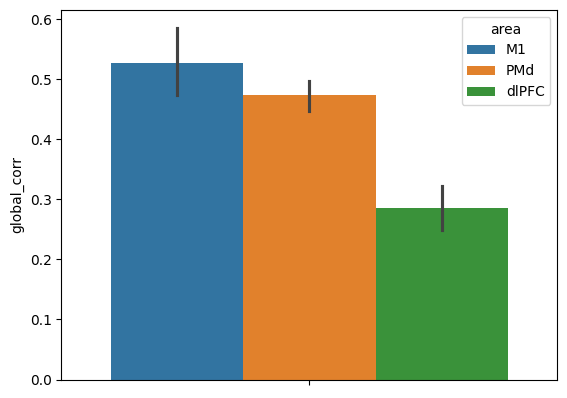

In [21]:
sns.barplot(data=results, hue="area", y="global_corr")

<Axes: ylabel='local_corr'>

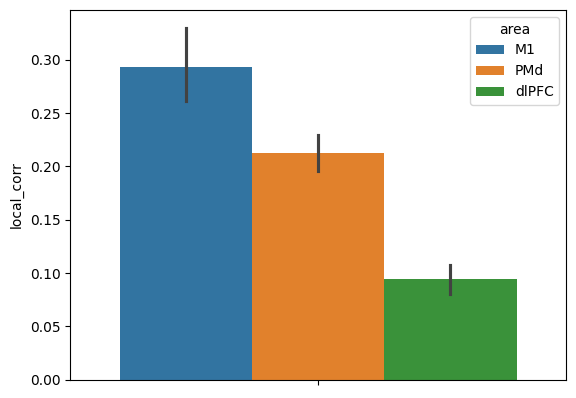

In [20]:
sns.barplot(data=results, hue="area", y="local_corr")